# Social Graphs Final Project

For this project, our goal is to take the top 150 most popular movies of all times on IMDB, and analyse the connection between the main actors starring in them. We want to get an insight into the dynamics of relationships and collaborations among actors in the film industry. For example, we might discover key actors who have repeatedly worked together, which would indicate successful collaborations.

## Creating the network

WE NEED THE CODE FOR MOVIES CAST NEW FILE HERE

ALSO NEED TO EXPLAIN THIS FOLLOWING CODE A BIT MORE WITH COMMENTS

In [2]:
import networkx as nx
import pickle
import re 
import matplotlib.pyplot as plt
import numpy as np
import powerlaw

In [3]:

def remove_number_dot_space(s):
    re.sub(r'^\d+\.\s*', '', s)

# to get the first x amount of items from the dictionary
def get_first_N_item(d, n):
    items = list(d.items())[:n]
    return dict(items)

# open the dictionary with the cast for each movie
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)
    
# only take the top 150 movies cast
new_data = get_first_N_item(data, 150)

# save the 150 movie titles
movie_titles = list(new_data.keys())

# create an empty graph
G = nx.Graph()
temp_names = new_data.values()
all_names = []

# we take the top cast from each movie, the first 10 actors
top_cast_nr = 10

for i in temp_names:
    if len(i) > top_cast_nr:
        i = i[:top_cast_nr]
    all_names += i

# remove repeated actors
unique_items = set(all_names)

# add unique actors as nodes to the graph
unique_list = list(unique_items)
G.add_nodes_from(unique_list)

data = new_data

actor_dict = {}
keys = data.keys()

for actor in list(G.nodes()):
    movies_list = [movie for movie, actors_list in data.items() if actor in actors_list]
    actor_dict[actor] = movies_list


print(actor_dict)


nx.set_node_attributes(G, actor_dict, 'movies starred in')

print(actor_dict)
for names in new_data.values():
    if len(names) > top_cast_nr:
        names = names[:top_cast_nr]
    
    for i in range(len(names)):
        for j in range(len(names)):
            if names[i] != names[j]:
                G.add_edge(names[i], names[j])
                
            


{'Adrien Brody': ['The Pianist'], 'Torin Thatcher': ['Witness for the Prosecution'], 'Tisca Chopra': ['Like Stars on Earth'], 'Zoë Kravitz': ['Spider-Man: Into the Spider-Verse'], 'Anthony Ramos': ['Hamilton'], 'Kaitlyn Dias': ['Inside Out'], 'Eugenie Bondurant': ['Fight Club'], 'Kôzô Hashida': ['Grave of the Fireflies'], 'Thora Birch': ['American Beauty'], 'Daniel Richter': ['2001: A Space Odyssey'], 'Jennifer Connelly': ['Once Upon a Time in America', 'Requiem for a Dream', 'Top Gun: Maverick', 'A Beautiful Mind'], 'William Duell': ["One Flew Over the Cuckoo's Nest"], 'Benedict Wong': ['Avengers: Infinity War', 'Avengers: Endgame', 'Spider-Man: No Way Home'], 'Vera Miles': ['Psycho'], 'Ving Rhames': ['Pulp Fiction'], 'Ed Stoppard': ['The Pianist'], 'David Carradine': ['Kill Bill: Vol. 1'], 'Morgan Freeman': ['The Shawshank Redemption', 'The Dark Knight', 'Se7en', 'The Dark Knight Rises', 'Batman Begins', 'Unforgiven'], 'Leslie Odom Jr.': ['Hamilton'], 'Matt McCoy': ['L.A. Confidentia

## Analysis of the network

from assignment 2, some things we could answer:

### Basic stats of the network

_Exercise 1a_: Stats (see lecture 4 and 5 for more hints)

> * What is the number of nodes in the network? 
> * What is the number of links?
> * Who is the top connected actor? Comment on your findings. Is this what you would have expected?


In [4]:
print("There are {} number of nodes in the network".format(G.number_of_nodes()))
print("There are {} number of links in the network".format(G.number_of_edges()))

There are 1287 number of nodes in the network
There are 6563 number of links in the network


In [21]:
# get the degrees of each node
degrees = dict(G.degree())

# all_degrees = [degrees[i] for i in G.nodes()]

# Sort degrees in descending order
sorted_degrees = sorted(degrees.items(), key=lambda item: item[1], reverse=True)

# Get the top 5 nodes
top_nodes = dict(sorted_degrees[:10])

# Print the names of the top 5 actors
print("Top 10 Actors:")
for actor_name, degree in top_nodes.items():
    print(f"{actor_name}: {degree} degrees")

Top 10 Actors:
Robert De Niro: 51 degrees
Morgan Freeman: 42 degrees
Tom Hanks: 39 degrees
Harrison Ford: 39 degrees
Leonardo DiCaprio: 36 degrees
Gary Oldman: 30 degrees
Mark Ruffalo: 29 degrees
Michael Caine: 29 degrees
Christian Bale: 29 degrees
Alec Guinness: 28 degrees


### Degree distribution of the network

> * Plot the degree distribution for the whole network. 
>   * Use axes that make sense for visualizing this particular distribution.
>   * What do you observe? 
>   * Give a pedagogical explaination of why the in-degree distribution is different from the out-degree distribution?
> * Find the exponent (by using the `powerlaw` package) for the in- and out-degree distributions. What does it say about our network?
> * Compare the two degree distributions to the degree distribution of a *random network* (undirected) with the same number of nodes and probability of connection *p*. Comment your results. ????? is this meaningful for us?


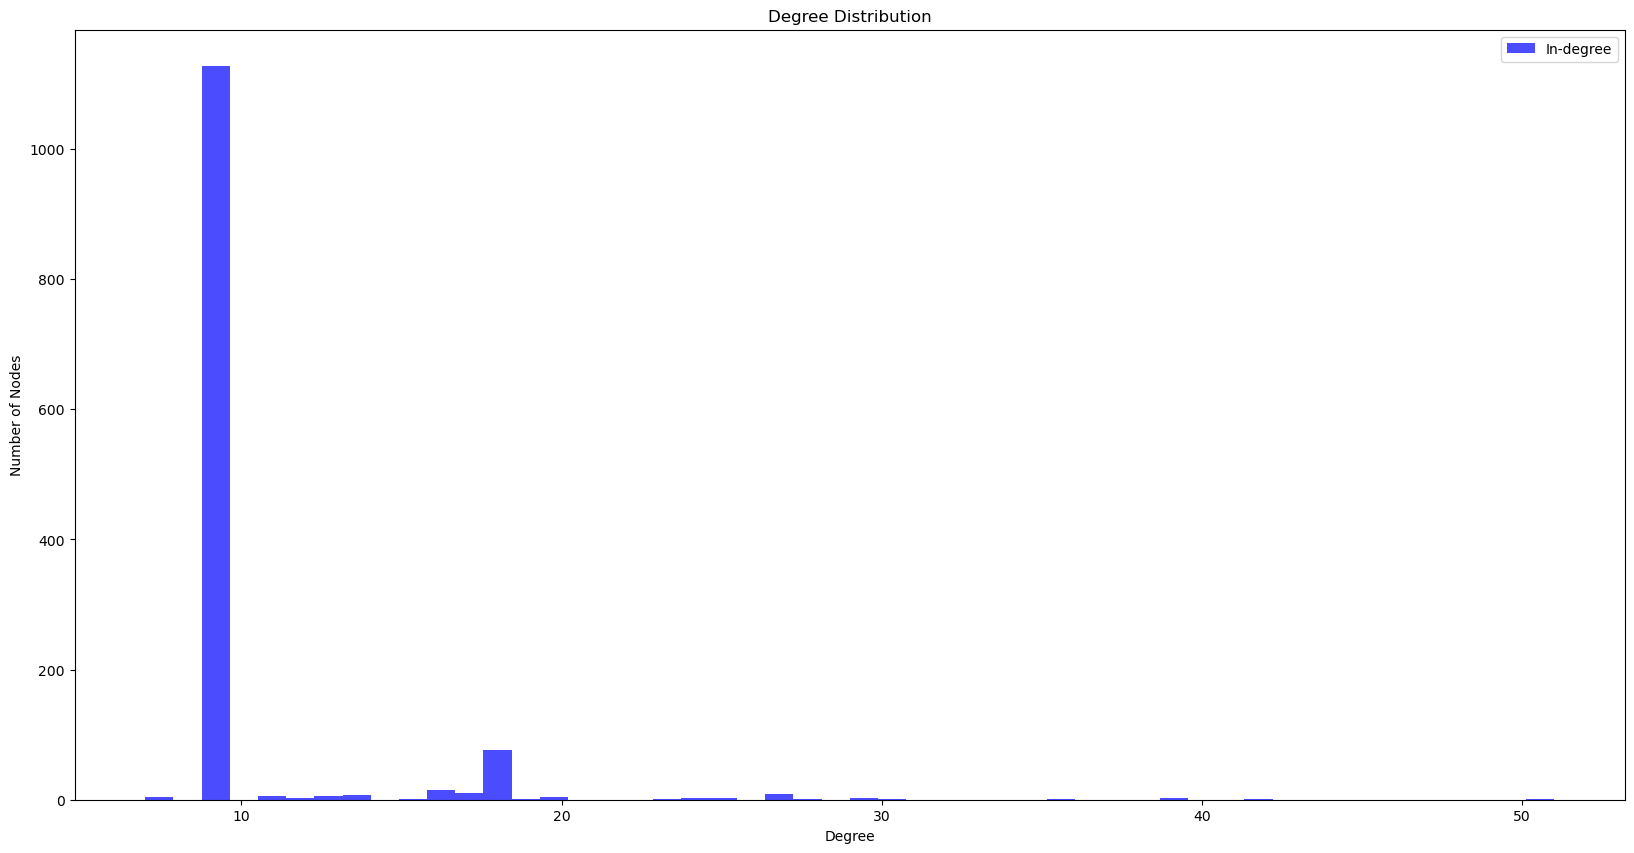

In [6]:
# make a list of the degrees
degrees_list = []
for node in G.nodes():
    degrees_list.append(degrees[node])

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot in-degree distribution
plt.hist(degrees_list, bins=50, color='blue', alpha=0.7, label='In-degree')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.legend()
plt.show()

In [7]:
degreesArray = np.array(degrees_list)
exponent_degrees = powerlaw.Fit(degreesArray + 1, xmin = 1, discrete=True).alpha
print("The exponent for the degree distribution is {}".format(exponent_degrees))

The exponent for the degree distribution is 1.3252197196926403



_Exercise 1b_: Visualization (see lecture 5 for more hints)

> * Create a nice visualization of the total network:
>   * Color nodes according to the role;
>   * Scale node-size according to degree;
>   * Get node positions based on either the Force Atlas 2 algorithm, or the built-in algorithms for networkX;
>   * Whatever else you feel like that would make the visualization nicer.
> * Describe the structure you observe. What useful information can you decipher from this?

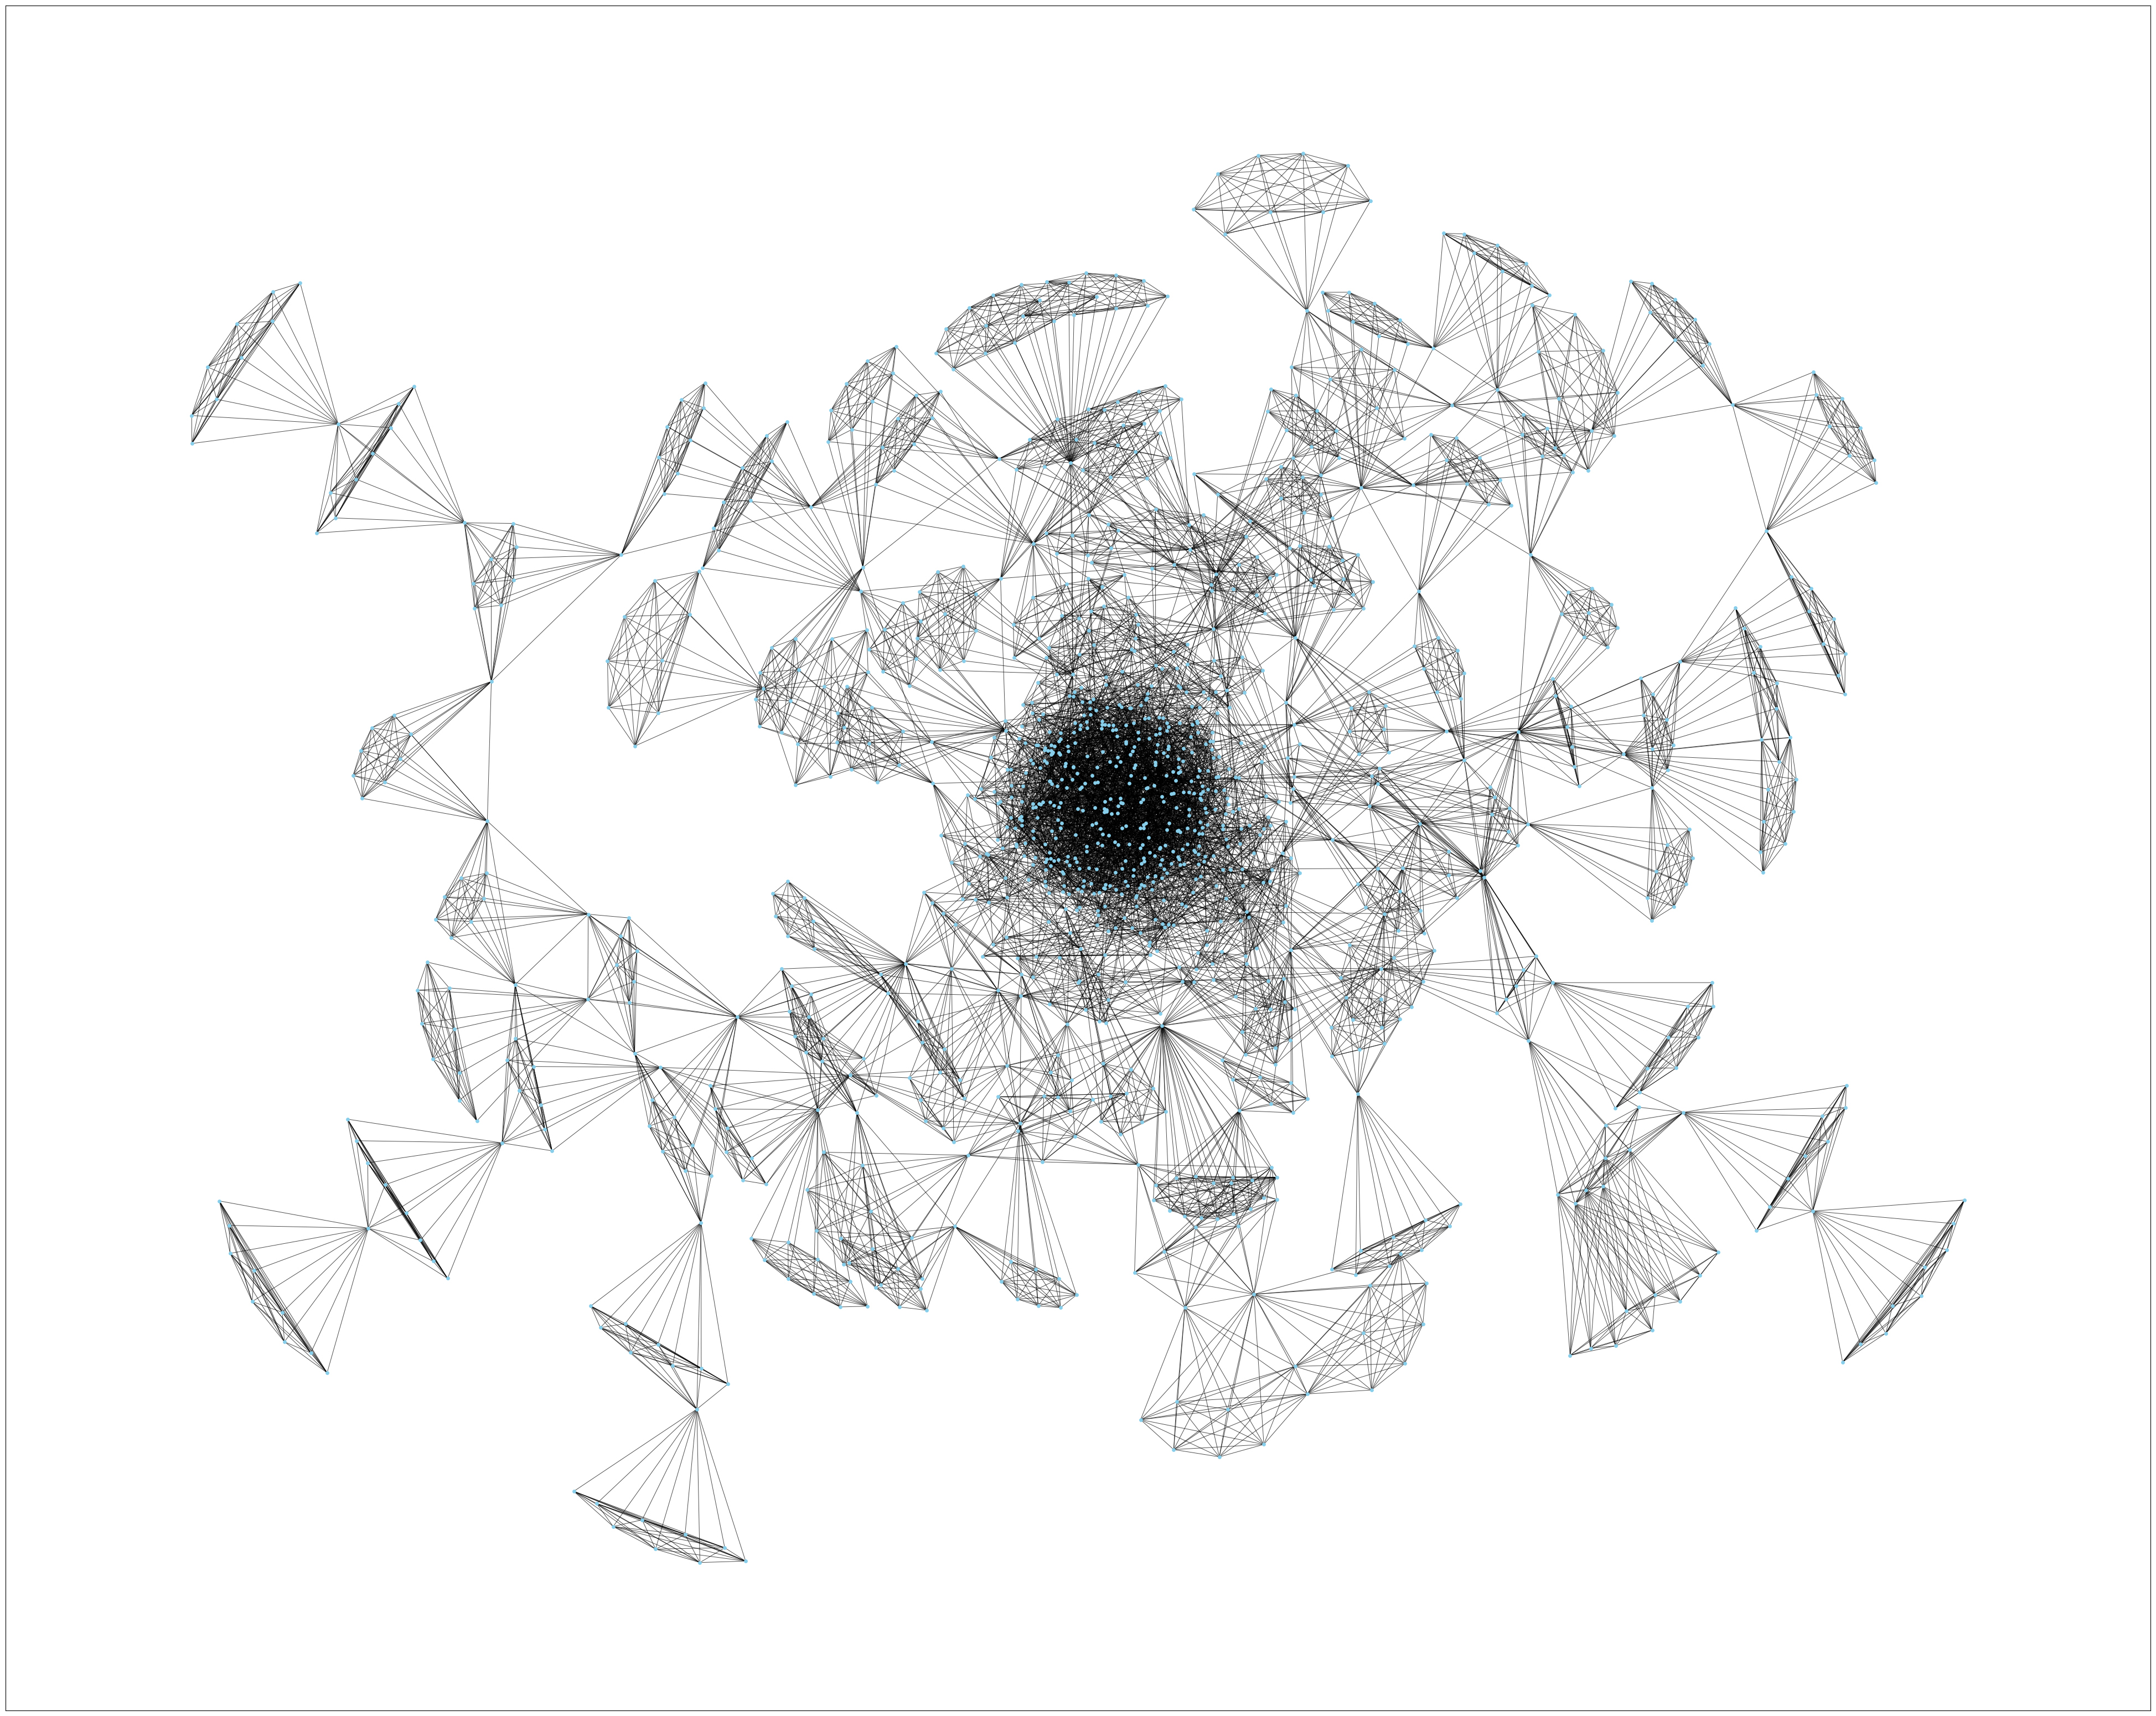

In [8]:
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, pos, node_size = all_degrees)

# Get positions for all nodes
pos = nx.kamada_kawai_layout(G)

# Set the figure size
plt.figure(figsize=(50, 40))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=15, node_color='skyblue')

# Draw edges
nx.draw_networkx_edges(G, pos, width=0.7, alpha=0.7)

plt.show()

## Communities in the network

In this section, we are going to try to find communities within the whole network of actors. To do so, we are using the Python-Louvian algorithm implementation, which is used to find partitions that potentially form communities in a network. It is an unsupervised algorithm, based on maximizing the modularity of the partitions it generates.

In [9]:
import networkx as nx
import community


# Apply the Louvain algorithm to find communities in the graph
communities = community.best_partition(G)

# Calculate modularity for the East Coast communities
modularity = community.modularity(communities, G)

In [10]:
print("Number of Communities:", len(set(communities.values())))
print("Modularity for Communities:", modularity)

Number of Communities: 55
Modularity for Communities: 0.9128235970917163


The modularity is very close to 1, which means it is significantly high. This indicates a very strong community structure within your network. However, the significance of this value can be better understood by comparing it to the modularity of a comparable random network. 

In [28]:
# Generate random networks and calculate modularity for each
num_random_networks = 2
modularity_random = []

for _ in range(num_random_networks):
    # Create a random graph with the same properties as G
    random_graph = nx.random_reference(G)

    # Apply Louvain algorithm to find communities in the random graph
    communities_random = community.best_partition(random_graph)

    # Calculate modularity for the random graph
    modularity_random.append(community.modularity(communities_random, random_graph))

# Plot a histogram of random modularity values
plt.hist(modularity_random, bins=20, alpha=0.5, label='Random Networks')
plt.axvline(modularity, color='red', linestyle='dashed', linewidth=2, label='Actual Network')
plt.xlabel('Modularity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [23]:
# Create a mapping of actors to their respective communities
actor_community_mapping = {actor: community_label for actor, community_label in communities.items()}

# Print information about actors in each community
for community_label in set(actor_community_mapping.values()):
    actors_in_community = [actor for actor, label in actor_community_mapping.items() if label == community_label]
    print(f"\nCommunity {community_label}:")
    print(actors_in_community)


Community 0:
['Adrien Brody', 'Ed Stoppard', 'Michal Zebrowski', 'Frank Finlay', 'Emilia Fox', 'Wanja Mues', 'Jessica Kate Meyer', 'Maureen Lipman', 'Julia Rayner', 'Richard Ridings']

Community 1:
['Martin Stringer', 'Jacob Stringer', 'Paul F. Tompkins', 'Stockton Taylor', 'Daniel Day-Lewis', 'Matthew Braden Stringer', 'Harrison Taylor', 'Joseph Mussey', 'Dillon Freasier', 'Barry Del Sherman']

Community 2:
['Tisca Chopra', 'Parikshit Sahni', 'Madhavan', 'Omi Vaidya', 'Darsheel Safary', 'Ravi Khanvilkar', 'Vipin Sharma', 'Jaaved Jaaferi', 'Mona Singh', 'Sachet Engineer', 'Kareena Kapoor', 'Boman Irani', 'Pratima V. Kulkarni', 'Lalitha Lajmi', 'Olivier Lafont', 'Tanay Chheda', 'Girija Oak', 'Sharman Joshi', 'Aamir Khan']

Community 3:
['Zoë Kravitz', 'Von Lewis', 'Brad Dourif', 'Sala Baker', 'David Aston', 'Maggie Nixon', 'Noel Appleby', 'Brian Tyree Henry', 'P.J. Byrne', 'Marton Csokas', 'Luna Lauren Velez', 'Jake Johnson', 'Billy Boyd', 'Sean Astin', 'Viggo Mortensen', 'Mike Hatton'

In [22]:
# find the top actors in the communities
print("Top 10 Actors:")
for actor_name, degree in top_nodes.items():
    community_label = actor_community_mapping.get(actor_name, "Not assigned to a community")
    print(f"{actor_name}: {degree} degrees, Community: {community_label}")

Top 10 Actors:
Robert De Niro: 51 degrees, Community: 46
Morgan Freeman: 42 degrees, Community: 16
Tom Hanks: 39 degrees, Community: 22
Harrison Ford: 39 degrees, Community: 49
Leonardo DiCaprio: 36 degrees, Community: 12
Gary Oldman: 30 degrees, Community: 16
Mark Ruffalo: 29 degrees, Community: 12
Michael Caine: 29 degrees, Community: 16
Christian Bale: 29 degrees, Community: 16
Alec Guinness: 28 degrees, Community: 49


Communities 12, 16 and 49, have some of the most popular actors. Especially 16, it has 4 out of the top 10 actors

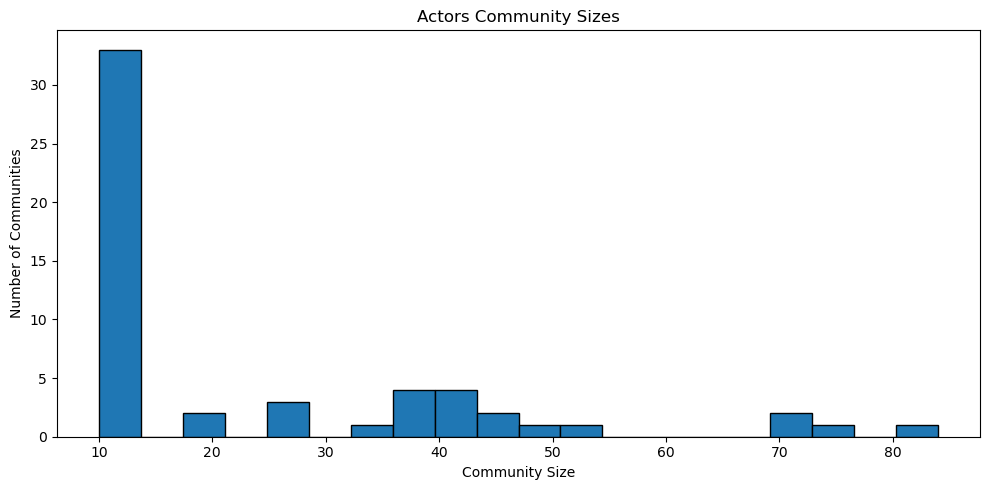

In [12]:
import collections

# compute the distribution of community sizes for the network
community_sizes = list(collections.Counter(communities.values()).values())

# Plot and print the distribution of community sizes
plt.figure(figsize=(10, 5))
plt.hist(community_sizes, bins=20, edgecolor='k')
plt.title("Actors Community Sizes")
plt.xlabel("Community Size")
plt.ylabel("Number of Communities")

plt.tight_layout()
plt.show()

## Text and sentiment analysis

justify why we take the wikipedia plot instead of imdb: imdb was shorteR?
basically explain everything in detail why we do it and explain model we use etc

In [13]:
import wikipedia
import pickle

In [14]:
def extract_plot_section(movie_title):
    try:
        # Check if the movie is "Hamilton"
        if movie_title.lower() == "hamilton":
            # For "Hamilton," look for the "== Synopsis ==" section
            plot_marker = "== Synopsis =="
        else:
            # For other movies, look for the "== Plot ==" section
            plot_marker = "== Plot =="
        
        a = wikipedia.search(movie_title + ' film')

        # get the wiki page for the movie
        wiki = wikipedia.page(a[0], auto_suggest = False)

        # find where the "Plot" section starts
        start = wiki.content.find(plot_marker)
        #print(start)
    
        # Check if the "Plot" section was found
        if start != -1:
            # Find where the next " == break line" occurs to mark the end of the Plot
            end = wiki.content.find(" ==\n", start + len(plot_marker))

            # Check if the closing "==" was found
            if end != -1:
                # Return the "Plot" section
                plot_section = wiki.content[start + len(plot_marker):end].strip()
                return plot_section
            else:
                return "Closing '==' not found for the 'Plot' section."
        else:
            return "Plot section not found for this movie."

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e}"
    except wikipedia.exceptions.HTTPTimeoutError:
        return "HTTP timeout error. Please try again later."
    except wikipedia.exceptions.PageError:
        return f"Page not found for {movie_title}."

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e}"
    except wikipedia.exceptions.HTTPTimeoutError:
        return "HTTP timeout error. Please try again later."
    except wikipedia.exceptions.PageError:
        return f"Page not found for {movie_title}."
    except Exception as e:
        return f"An error occurred: {str(e)}"

In [15]:
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)

In [16]:
print(data)

{'The Shawshank Redemption': ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 'Clancy Brown', 'Gil Bellows', 'Mark Rolston', 'James Whitmore', 'Jeffrey DeMunn', 'Larry Brandenburg', 'Neil Giuntoli', 'Brian Libby', 'David Proval', 'Joseph Ragno', 'Jude Ciccolella', 'Paul McCrane', 'Renee Blaine', 'Scott Mann', 'John Horton', 'Gordon Greene', 'Alfonso Freeman', 'Vincent Foster', 'John E. Summers', 'Frank Medrano', 'Mack Miles', 'Alan R. Kessler', 'Morgan Lund', 'Cornell Wallace', 'Gary Lee Davis', 'Neil Summers', 'Ned Bellamy', 'Joe Pecoraro', 'Harold E. Cope Jr.', 'Brian Delate', 'Don McManus', 'Donald Zinn', 'Dorothy Silver', 'Robert Haley', 'Dana Snyder', 'John D. Craig', 'Ken Magee', 'Eugene C. DePasquale', 'Bill Bolender', 'Ron Newell', 'John R. Woodward', 'Chuck Brauchler', 'Dion Anderson', 'Claire Slemmer', 'James Kisicki', 'Rohn Thomas', 'Charlie Kearns', 'Rob Reider', 'Brian Brophy', 'Paul Kennedy', 'James Babson', 'Dennis Baker', 'Fred Culbertson', 'Richard Doo

In [17]:
# new dictionary to store movie titles and their plot sections
movie_plots = {}

# Iterate through the movie titles in the original dictionary
for movie_title in data:
    # extract the plot section for each movie
    plot_summary = extract_plot_section(movie_title)
    
    # add the movie title and plot summary to the new dictionary
    movie_plots[movie_title] = plot_summary

In [18]:
print(movie_plots)

{'The Shawshank Redemption': 'In early 1947, Portland, Maine, banker Andy Dufresne arrives at Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover. He is befriended by Ellis "Red" Redding, a contraband smuggler serving a life sentence, who procures a rock hammer and a large poster of Rita Hayworth for Andy. Assigned to work in the prison laundry, Andy is frequently sexually assaulted by prison gang "the Sisters" and their leader, Bogs Diamond.\nIn 1949, Andy overhears the captain of the guards, Byron Hadley, complaining about being taxed on an inheritance and offers to help him shelter the money legally. After an assault by the Sisters nearly kills Andy, Hadley beats and cripples Bogs, who is subsequently transferred to another prison; Andy is not attacked again. Warden Samuel Norton meets Andy and reassigns him to the prison library to assist elderly inmate Brooks Hatlen, a front to use Andy\'s financial expertise to manage financial matt

In [19]:
# save the movie_plots dictionary to a new file (e.g., "movie_plots.pkl")
with open("movie_plots.pkl", "wb") as fp:
    pickle.dump(movie_plots, fp)